## Regresja logistyczna

Stałe

In [137]:
SEED = 249919
SAMPLES = 2419

Generowanie danych

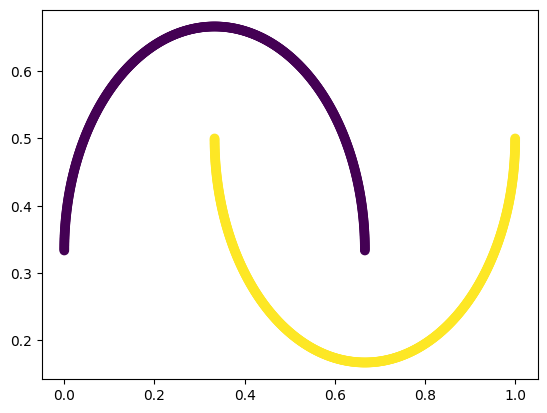

In [138]:
import numpy as np
from sklearn.datasets import make_moons, make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

X, y = make_moons(n_samples=1000, random_state=SEED)
X = NormalizeData(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

X_class, y_class = make_classification(n_samples=1000, random_state=SEED)
X_class = NormalizeData(X_class)
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=SEED)

plt.scatter(X[:,0], X[:,1], label = "Data", c = y)
plt.show()


Implementacja ze wzoru

In [139]:
import math
import random as rnd

def fun(s,b = 0.1):
    return 1 / (1 + math.e ** (-b * s))

def logistic_regression_calssifier(data, target, learn_rate = 0.1, iterations = 20, target_error = 0.1):
    X = data
    T = target

    n_samples, n_features = X.shape
    w = np.array([rnd.uniform(0,1) for _ in range(X.shape[1])])
    w_prev = np.array([rnd.uniform(0,1) for _ in range(X.shape[1])])
    err_array = []

    for _ in range(iterations):
        for i in range(n_samples):
            y = X[i] @ w
            err_array.append((T-y)**2)

            temp = fun(X[i].T @ w)
            temp__prev = fun(X[i].T @ w_prev)

            w_delta = -learn_rate * (T[i] - y) * temp * (1 - temp__prev) * X[i]
            w_prev = w
            w = w - w_delta
        
        if np.mean(err_array) < target_error:
            break
    return np.array(w)



Predykcja Moons

In [140]:

w = logistic_regression_calssifier(X_train, y_train)
y_predicted = np.array([1 if i > 0.5 else 0 for i in np.dot(X_test, w)])

Predykcja Classification

In [141]:

w = logistic_regression_calssifier(X_class_train, y_class_train)
y_class_predicted = np.array([1 if i > 0.5 else 0 for i in np.dot(X_class_test, w)])

Wykresy

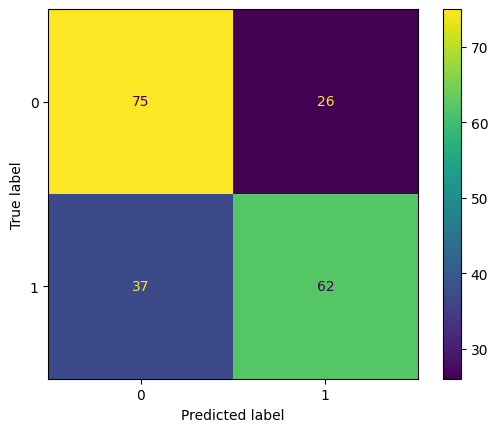

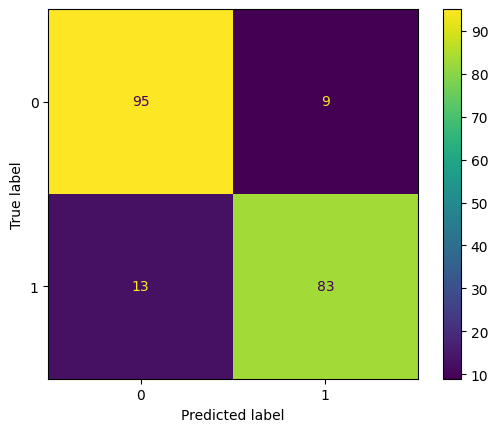

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

cm = confusion_matrix(y_class_test, y_class_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

Metryki

Sensitivity 0.8645833333333334
Specificity 0.9134615384615384


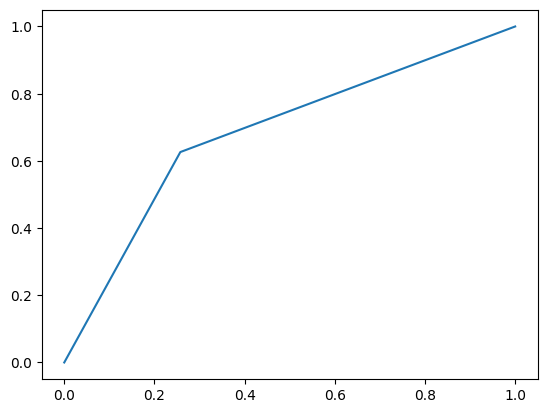

In [143]:
from sklearn.metrics import roc_curve

tn, fp, fn, tp = cm.ravel()
sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)
print(f"Sensitivity {sensitivity}")
print(f"Specificity {specificity}")

fpr, tpr, thresholds = roc_curve(y_test, y_predicted)
plt.plot(fpr,tpr)
plt.show()

Klasa wygenerowana

[1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0
 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1
 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1
 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1
 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1]


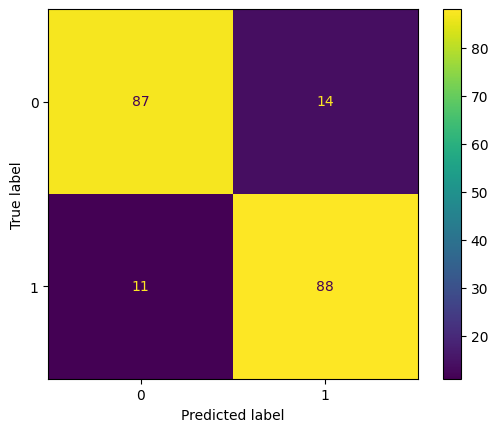

In [144]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Inicjalizuj wagi jako wektory zerowe
        self.weights = np.zeros(n_features)

        # Oblicz gradient i aktualizuj wagi w każdej iteracji
        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights)
            y_predicted = self._sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))

            self.weights -= self.learning_rate * dw

    def predict(self, X):
        linear_model = np.dot(X, self.weights)
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
logistic_regression = LogisticRegression().fit(X,y)
y_predicted = logistic_regression.predict(X_test)
print(y_predicted)

cm = confusion_matrix(y_test, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Implementacja sklearn Moons

Moon 0.865


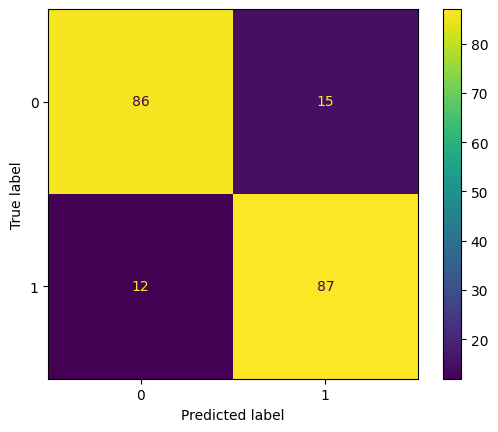

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

clf = LogisticRegression(random_state=SEED, max_iter=100).fit(X_train, y_train)
y_predicted = clf.predict(X_test)
print(f"Moon {clf.score(X_test, y_test)}")

cm = confusion_matrix(y_test, y_predicted, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()


Metryki

Sensitivity 0.8787878787878788
Specificity 0.8514851485148515


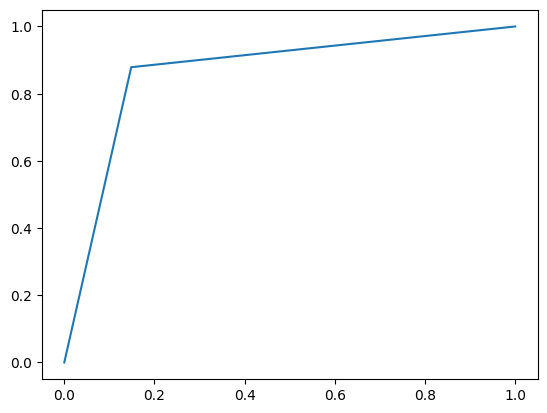

In [146]:
tn, fp, fn, tp = cm.ravel()
sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)
print(f"Sensitivity {sensitivity}")
print(f"Specificity {specificity}")

fpr, tpr, thresholds = roc_curve(y_test, y_predicted)
plt.plot(fpr,tpr)
plt.show()

Implementacja sklearn Classification

Moon 0.895


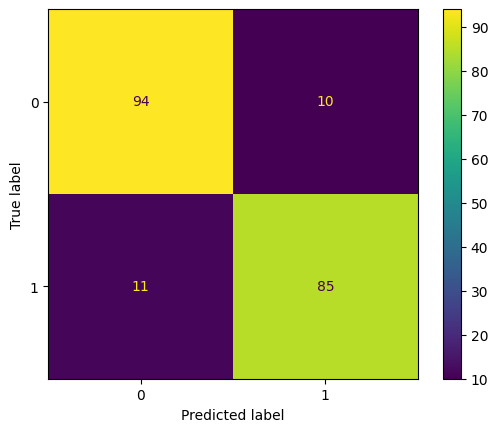

In [147]:
clf = LogisticRegression(random_state=SEED, max_iter=100).fit(X_class_train, y_class_train)
y_predicted = clf.predict(X_class_test)
print(f"Moon {clf.score(X_class_test, y_class_test)}")

cm = confusion_matrix(y_class_test, y_predicted, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

Metryki

In [ ]:
tn, fp, fn, tp = cm.ravel()
sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)
print(f"Sensitivity {sensitivity}")
print(f"Specificity {specificity}")

fpr, tpr, thresholds = roc_curve(y_test, y_predicted)
plt.plot(fpr,tpr)
plt.show()